# ASTR 1040 Midterm 2 practice problems

For reference, all of the `astropy` constants as well as examples can be found [here](https://docs.astropy.org/en/stable/constants/index.html). Likewise all of the units and their names / how to access them can be found [here](https://docs.astropy.org/en/stable/units/index.html). 

To create a variable with units you need to multiply by the corresponding unit class:

```python
d = 1 * units.au
```

You can then convert unitful quantities to other units by calling the `to` method and passing the desired end unit class: 

```python
d_m = d.to(units.m)
```

If you have a ratio of quanities where all the units should cancel out, you can obtain the dimensionles number using the `dimesionless_unscaled` method. For example writing:
```python
d_m/d
``` 
yields $1.4959787\times 10^{11} \rm{\frac{m}{AU}}$, but doing:
```python
(d_m/d).to(units.dimensionless_unscaled)
```
returns `1.0` as expected.

In [1]:
#SETUP CELL (modify at your own peril)
from astropy import units #access units by doing units.<unit> (i.e. units.au)
from astropy import constants
import numpy as np #common math functions (i.e. np.sin(x)) and better arrays (i.e. np.array([1,2,3])
import matplotlib.pyplot as plt #plotting functions (i.e. plt.plot(x,y))
G = constants.G # gravitational constant
M_sun = constants.M_sun # mass of the sun
R_sun = constants.R_sun # radius of the sun
L_sun = constants.L_sun # luminosity of the sun
M_earth = constants.M_earth # mass of the earth
R_earth = constants.R_earth # radius of the earth
M_jup = constants.M_jup # mass of jupiter
R_jup = constants.R_jup # radius of jupiter
sigma_sb = constants.sigma_sb # Stefan-Boltzmann constant
b_wien = constants.b_wien # Wien's displacement constant
c = constants.c # speed of light
h = constants.h # Planck constant
k_B = constants.k_B # Boltzmann constant
m_e = constants.m_e # mass of electron
m_p = constants.m_p # mass of proton 
m_n = constants.m_n # mass of neutron (basically just the mass of a proton but whatever)
g0 = constants.g0 # standard gravity, 9.8 m/s^2
e = constants.e # absolute value of electron/proton charge

**Note: the solutions to all these problems can be found in the notebook `midterm2reviewSolutions` &mdash; I've left this one blank in case you want to try the problems without seeing the solutions first.**

## Practice problem 1

Suppose you observe two galaxies: 

Galaxy A you measure is a 100 Mpc away, and you measure a recessional velocity of 100 km/s.

Galaxy B is 30 Mpc away, and you measure a recessional velocity of 30 km/s.

### a) Make a plot showing the velocity on the y-axis and position on the x-axis for these two galaxies

**Solution: I'm going to do this in code only, but you can also of course draw this by hand:**

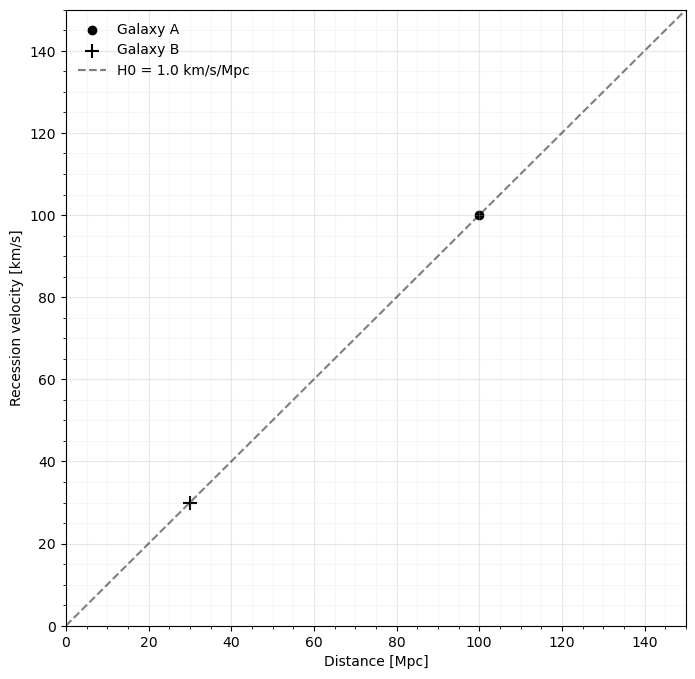

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
#the above two lines are a slightly fancier way of plotting that lets you change things about how the plot looks easier compared to plt.plot
galaxyA = [100,100] #Mpc, km/s = (x,y)
galaxyB = [30,30] #Mpc, mk/s = (x,y)
ax.scatter(galaxyA[0],galaxyA[1],marker="o",c="black",label="Galaxy A") #plot points
ax.scatter(galaxyB[0],galaxyB[1],marker="+",c="black",label="Galaxy B",s=100)
m = (galaxyA[1]-galaxyB[1])/(galaxyA[0]-galaxyB[0]) #slope = rise/run = (y2-y1)/(x2-x1)
line = lambda m,x,b : m*x+b #formula for line as anonymous function
x = np.linspace(0,150,2) #only need 2 points for a straight line
ax.plot(x,line(m,x,0),ls="--",label="H0 = {} km/s/Mpc".format(m),c='black',alpha=0.5)
l=ax.legend(frameon=False)
ax.set_xlim(0,150); ax.set_ylim(0,150)
ax.minorticks_on()
ax.set_xlabel("Distance [Mpc]")
ax.set_ylabel("Recession velocity [km/s]")
ax.grid(which='major',alpha=0.3)
ax.grid(which='minor',alpha=0.1)

### b) Using your plot from part a, what would you infer Hubble's constant to be?

**Solution: the slope of the line is 1 km/s/Mpc, so this is $H_0$ in our hypothetical universe.**

### c) Using your value from part b and assuming constant expansion, what would you infer the age of the universe to be? 

**Assuming a constant expansion rate, we can work out the age of the universe by simply inverting $H_0$, i.e:**

$$v = H_0d \rightarrow \frac{d}{t} = H_0d \rightarrow \frac{1}{t} = H_0 \rightarrow \boxed{t = \frac{1}{H_0} \approx 10^{12} \rm{yrs}}$$

In [33]:
H0 = m*units.km/units.s/units.Mpc #slope from above, but this time assigning units to it
t = (1/H0).to(units.yr)
t

<Quantity 9.77792222e+11 yr>

### d) Suppose that to determine the velocity you need to look for a spectral line that usually occurs at 1000 Angstroms for nearby galaxies. Suppose your fanciest telescope can see wavelengths as long as 1 micrometer. How far back in time would you be able to see? 

**Solution: the maximum possible change in wavelength will be $\Delta \lambda = 1 \mu \rm{m} - 1000 \mathring{A} = 10^{-6}\rm{m} - 1000\times 10^{-10}\rm{m} = 9\times 10^{-7}\rm{m}$**.

**We can use this to calculate a maximum redshift:**

$$z_{\rm{max}} = \frac{\Delta \lambda}{\lambda} = \frac{9\times 10^{-7} \rm{m}}{10^{-7}\rm{m}} = 9$$

**We can then use this redshift to calculate the recession velocity for an object at this z:**

$$\frac{v}{c} = \frac{(1+z)^2-1}{(1+z)^2+1} = \frac{10^2-1}{10^2+1} = \frac{99}{101} \rightarrow v \approx 2.94\times 10^5 \rm{km/s}$$

**We can find the distance to such an object using Hubble's law:**

$$d_\rm{max} = \frac{v}{H_0} = \frac{2.94\times 10^5 \rm{km/s}}{1 \rm{km/s/Mpc}} = 2.94\times 10^5 \rm{Mpc}$$

**Converting this into units of lightyears will then allow us to see how far back we can see:**

$$t_\rm{max} = \frac{d_\rm{max}}{c} = \frac{(2.94\cdot 3.26)\times 10^{11} \rm{lyr}}{1 \rm{lyr/yr}} \approx \boxed{9.6 \times 10^{11} \rm{yr}}$$

**This is roughly 98% of the age we calculated for our hypothetical universe in the previous part, so we'd be able to see everything except for the first 2%!**

In [48]:
Δλ = 1*units.micrometer-1000*units.Angstrom
λ = 1000*units.Angstrom
z = Δλ/λ
v = ((1+z)**2-1)/((1+z)**2+1)*c
v.to(units.km/units.s)
dMax = v/H0
tMax = (dMax/c).to(units.yr)
tMax

<Quantity 9.58429999e+11 yr>

## Practice problem 2

### a) Calculate and compare the densities of white dwarves, neutron stars, and stellar mass black holes
For the white dwarf take the mass to be 1 solar mass and the radius to be that of the Earth, for the neutron star take a mass of 2 solar masses and a radius of 10 km, and for a stellar mass black hole use a mass of 3 solar masses. Can you distinguish these objects based on their densities? Practically (observationally) how might you do this? 

**Solution: Density is just mass divided by volume. We'll assume all are roughly spherical, then density is just:**

$$\rho = \frac{M}{\frac{4}{3}\pi r^3}$$

**Thus the densities for each object (using the values given in the problem) are:**

$$\rho_\rm{WD} = \frac{M_\odot}{\frac{4}{3}\pi r_\oplus^3}\approx 1.8 \times 10^9\rm{kg/m^3}$$

$$\rho_\rm{NS} = \frac{2M_\odot}{\frac{4}{3}\pi (10\rm{km})^3}\approx 9.5 \times 10^{17} \rm{kg/m^3}$$

$$\rho_\rm{BH} = \frac{3M_\odot}{\frac{4}{3}\pi \left(\frac{6GM_\odot}{c^2}\right)^3}\approx 2\times 10^{18} \rm{kg/m^3}$$


In [57]:
V = lambda r : 4/3*np.pi*r**3 #anonymous function that calculates volume 

ρWD = M_sun/V(R_earth) #density is M/V
ρNS = 2*M_sun/V(10*units.km) #for neutron star M = 2Msun and r = 10 km
Rs = 2*G*3*M_sun/c**2 #for BH we need to calculate Rs to get volume
ρBH = 3*M_sun/V(Rs) #BH density 
print("ρWD = {:.2g}\nρNS = {:.2g}\nρBH = {:.2g}".format(ρWD.si,ρNS.si,ρBH.si))

ρWD = 1.8e+09 kg / m3
ρNS = 9.5e+17 kg / m3
ρBH = 2e+18 kg / m3


**We can definitely distinguish between white dwarves and neutron stars, as they are different in density by almost 8 orders of magnitude! Observationally one way we can do this (as discussed in class) is observing the spin rate of pulsars, which put a constraint on the density. For black holes we can also look for emission / orbiting objects as close as possible to the event horizon to constrain their radii and thus their densities.**

### b) Qualitatively, how would you expect the size of each of these objects to change as you increase their mass? 

**White dwarves and neutron stars are supported by degeneracy pressure, and degeneracy pressure increases as objects are squished tighter and tighter, thus for white dwarves and neutron stars adding mass will increase the gravitational pressure, which will cause them to contract in order to increase the degeneracy pressure to match this. For black holes we know that their size is directly proportional to their mass, so increasing their mass will increase their size. This means that the density of a black hole is inversely proportional to the square of its mass, thus more massive black holes actually have *lower* densities.**

### c) Make a plot of black hole density as a function of mass

It will be easiest to visualize this if you make your plot log-log scale. 

Include a few horizontal lines to guide the eye: the average density of the Earth and the density of water (you can add more for other objects if you want). Also label the location of a few known black holes (say a stellar mass black hole like Cyg X-1, the supermassive black hole at the center of our galaxy, the one at the heart of Andromeda, and the first one to have its photo taken at the heart of M87). Do you notice anything suprising? 

Think about this line as an inequality &mdash; what side of the line is allowed for matter to have and why?

*Bonus*: add on your white dwarf and neutron star from the previous parts to your plot. Where do they lie? 

**Solution: I will again just do this in code, but you can draw by hand as well and that's perfectly fine!**

**The density of water is roughly 1,000 kg/m^3, and the density of Earth is roughly 5 times that.**

**The supermassive black hole at the center of our galaxy has a mass of roughly 4 million solar masses, the one at the heart of Andromeda has a mass of roughly 140 million times that of our Sun, and the one in M87 is bigger still at roughly 5 billion solar masses. Cyg X-1 is uncertain but likely in the 10-20 solar mass range, so we'll pick 15.**

**To plot density as a function of mass we need to extend our result from the first part of this problem:**

$$\rho_\rm{BH} = \frac{M}{\frac{4}{3}\pi R_s^3} = \frac{M}{\frac{4}{3}\pi \left(\frac{2GM}{c^2}\right)^3} = \boxed{\frac{3c^6}{32\pi G^3 M^2}}$$

**Using this relationship, we can now make the requested plot:**

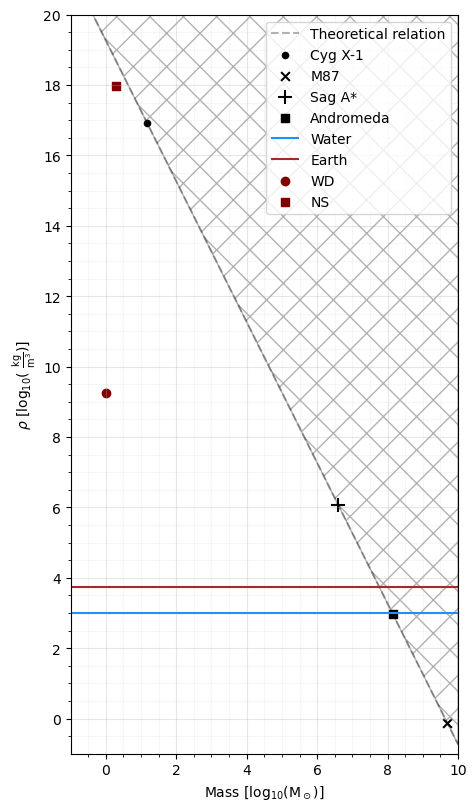

In [137]:
ρBH = lambda M : 3*c**6/(32*np.pi*G**3*M**2) #functional form of math given above
MCygX1 = 15*M_sun; MM87 = 5e9*M_sun; MSagA = 4e6*M_sun; MAnd = 140e6*M_sun
ρCygX1 = ρBH(MCygX1); ρM87 = ρBH(MM87); ρSagA = ρBH(MSagA); ρAnd = ρBH(MAnd)


fig = plt.figure(figsize=(5,9.6))
ax = fig.gca()
ax.axis('equal')
Mline = np.logspace(-1,10,100)*M_sun #logspace is the same as linspace but the numbers are evenly spaced in logspace, so this makes 100 numbers from 10^0 to 10^10
ρLine = ρBH(Mline)
#notice that in the plot below I (as suggested) take the log of both values. What is the slope of this line and does it make sense to you?
ax.plot(np.log10(Mline.to(units.M_sun).value),np.log10(ρLine.si.value),c="black",ls="--",label="Theoretical relation",alpha=0.3)
#add our black holes to the plot
MList = [MCygX1.to(units.M_sun).value,MM87.to(units.M_sun).value,MSagA.to(units.M_sun).value,MAnd.to(units.M_sun).value]
ρList = [ρCygX1.si.value,ρM87.si.value,ρSagA.si.value,ρAnd.si.value]
markerList = ["o","x","+","s"]
sizeList = [20,40,100,40]
labelList = ["Cyg X-1","M87","Sag A*","Andromeda"]
for (M,ρ,marker,label,size) in zip(MList,ρList,markerList,labelList,sizeList): #plot all our known values
    ax.scatter(np.log10(M),np.log10(ρ),label=label,c="black",marker=marker,s=size)
#plot formatting stuff
ax.set_yticks(np.linspace(0,20,11))
ax.minorticks_on()
ax.set_xlim(-1,10); ax.set_ylim(-1,20)
ax.set_xlabel(r"Mass [$\rm{log_{10}}(M_\odot)$]")
ax.set_ylabel(r"$\rho$ [$\rm{log_{10}}$( $\rm{\frac{kg}{m^3}}$)]")
ax.grid(which='major',alpha=0.3)
ax.grid(which='minor',alpha=0.1)
ax.fill_between(np.log10(Mline.to(units.M_sun).value),ax.get_ylim()[1],np.log10(ρLine.si.value),
                color="none",hatch="X",edgecolor="black",alpha=0.3)
#adding horizontal lines for water and earth density
ax.hlines(np.log10(1000),-1,10,color="dodgerblue",label="Water")
ax.hlines(np.log10(5500),-1,10,color="brown",label="Earth")
#adding WD and NS from before
ax.scatter(np.log10(1),np.log10(ρWD.si.value),marker="o",c="maroon",label="WD")
ax.scatter(np.log10(2),np.log10(ρNS.si.value),marker="s",c="maroon",label="NS")
l=ax.legend(facecolor="white")


**One fun (and maybe surprising) fact is that we can see that the Andromeda black hole has a density roughly that of water! That's kind of fun. Matter can only be as dense as it would be for a black hole of that size, so we've filled in the area above the theoretical black hole line. One example of this is the Earth line &mdash; if you managed to pack roughly 100 million solar masses worth of Earth density material together it would have to form a black hole! When we added on the neutron star and white dwarf matter we can see that the neutron star is quite close to this theoretical boundary (which makes sense given that neutron degeneracy pressure is the last thing that stops stuff from collapsing into a black hole) and the white dwarf is safely in the space allowed to normal matter, but much more dense than normal matter (like water or the Earth) as we would expect.**

## Practice problem 3

Suppose you are playing a game of baseball on the moon (no atmosphere), and you heard from a friend taking ASTR 1040 that if you throw the ball hard enough you could get it to orbit and come back to you! 

### a) How fast would you need to throw the baseball to get it to orbit?

Assume that you throw the ball from a height roughly equal to your own height (use 2m if you just want a number). You will need to look up the mass and radius of the moon, and let's assume there are no mountains in your way (the moon is a perfect sphere). 

**Solution: Since the moon is basically a sphere we can assume the orbit will be circular and calculate this with:**

$$v = \sqrt{\frac{GM}{r}}$$ 

**where $r$ is the distance from the moon's center to the orbiting object (the radius of the moon + 2m).**

**Plugging in numbers for the moon then gives us:**
$$v = \sqrt{\frac{G(7.35\times10^{22}\rm{kg})}{1740\rm{km}}} \approx \boxed{1.68 \rm{km/s}} $$

In [142]:
mMoon = 7.35e22*units.kg; rMoon = 1740*units.km
v = np.sqrt(G*mMoon/(rMoon))
v.to(units.km/units.s)

<Quantity 1.679082 km / s>

### b) How long would it take to return to you? 

Answer in hours.

**Solution: The circumference of the orbit is just $2\pi r \approx 2\pi 1740\rm{km}\approx 10900 \rm{km}$, and since the orbit is circular the velocity calculated above will be constant across the orbit so we can just take the circumference and divide it by the velocity to get the time it takes to complete one orbit:**

$$P = \frac{C}{v} = \frac{2\pi r}{\sqrt{\frac{GM}{r}}} = \frac{2\pi r^{3/2}}{\sqrt{GM}}\approx \boxed{1.8 \rm{hr}}$$

In [145]:
P = 2*np.pi*(rMoon)**(3/2)/np.sqrt(G*mMoon) #can also do P = 2*np.pi*rMoon/v 
P.to(units.hr)

<Quantity 1.80865073 h>

**note that in answering parts a and b I just took the radius of the moon, as adding a few meters to it is not going to change the values very much, but technically to be most accurate we should have added the radius of the moon + 2m when doing our calculations.**

### c) Is this physically plausible? 

Consider that the fastest pitchers can throw the ball at a little over 100 mph.

*Bonus:* Calculate how far away the ball would land if thrown at 100 mph. 

**Solution: no...100 mph is roughly 0.045 km/s, so the ball would need to be thrown about 40 times faster than the fastest pitchers can throw it to orbit. I'm too lazy to do this out but to calculate the bonus portion you would need to calculate the gravitational acceleration of the moon, figure out how long it would take for the ball to fall 2m vertically, then multiply that time by the horizontal velocity (100 mph). That answer assumes that the moon's surface is flat (no curvature), but you should check to see if that's a good approximation or if you need to take into account the moon's curvature as well.**


### d) Make it plausible(?)

How high up would you have to play your game of baseball to need to worry about accidentally creating baseball satellites after your pitches?

*Bonus:* Alter something else in the problem (sport, method of projectile launching, etc.) to make it plausible.

**Given that the velocity humans *can* achieve is roughly 0.045 km/s, we can calculate the distance we would need to be at as:**

$$r = \frac{GM}{v^2} \approx 2.4 \times 10^6 \rm{km} \approx 1392 r_\rm{moon}$$

**This includes the radius of the moon, thus we would need to be at an altitude of 1391 times the radius of the moon playing our baseball game. Unfortunately this is larger than the Earth moon distance, which is only around 220 lunar radii, thus it's likely not ever plausible for a human powered baseball pitch to orbit the moon.**

In [152]:
vPitch = 0.045*units.km/units.s
r = G*mMoon/vPitch**2
(r/rMoon).si

<Quantity 1392.25500213>